#### 케라스로 텐서플로 허브 사용하기: 간단한 이미지 분류

In [1]:
# 라이브러리 import
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import layers

In [2]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

In [3]:
# hub.module을 사용하여 mobilenet 불러오기, 그 후, 케라스 레이어로 만들기
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))   #채널 추가(컬러)
])

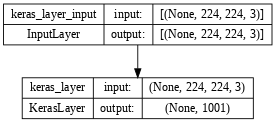

In [4]:
# 네트워크 확인
tf.keras.utils.plot_model(classifier, show_shapes=True, dpi=64)

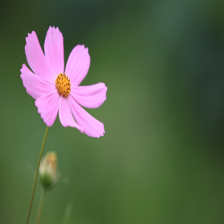

In [7]:
# 구글의 이미지 하나 업로드하여 모델에 적용
import numpy as np
import PIL.Image as Image

# 구글 드라이브 마운트 통해 파일 오픈
flower = Image.open("/content/flower.jpg")
flower = flower.resize(IMAGE_SHAPE)
flower

In [8]:
flower = np.array(flower)/255.0
flower.shape

(224, 224, 3)

In [9]:
# 모델에 이미지 넣기
result = classifier.predict(flower[np.newaxis, ...])    #np.newaxis: 차원 하나 늘려주기
result.shape                                            # result의 결과는 1001 벡터, 주어진 이미지의 각 클래스에 속할 확률값

1/1 [==============================] - 1s 718ms/step


(1, 1001)

In [10]:
# argmax로 가장 높은 확률값을 갖는 클래스 구하기
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

986

In [11]:
# class ID 예측, ImageNet의 클래스 레이블 불러오기
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

10484/10484 [==============================] - 0s 0us/step


In [12]:
print(imagenet_labels)
print(imagenet_labels[predicted_class])

['background' 'tench' 'goldfish' ... 'bolete' 'ear' 'toilet tissue']
daisy


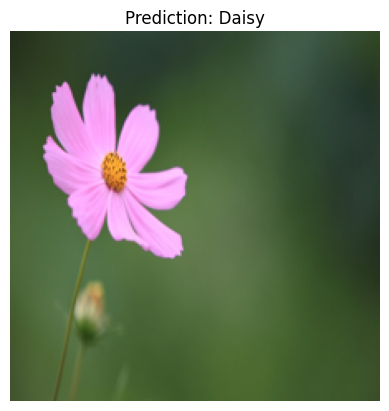

In [13]:
plt.imshow(flower)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())